<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94_Numpy_%ED%99%9C%EC%9A%A9_%ED%95%98%EB%8A%94_%EA%B3%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 영상처리

In [7]:
import cv2 #OpenCV 라이브러리를 사용하기 위한 구문
from google.colab.patches import cv2_imshow #코랩에서 시각화를 위해 필요한 구문

In [8]:
cv2.__version__

'4.1.2'

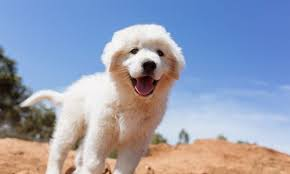

In [84]:
path='/content/drive/MyDrive/module/dog1.jpg'
image = cv2.imread(path,cv2.IMREAD_COLOR)
cv2_imshow(image)

In [11]:
print(type(image))

<class 'numpy.ndarray'>


In [12]:
print(image.shape) #bgr로 나열되어 출력

(495, 729, 3)


# 빈 이미지 만들어서 작업하기

In [14]:
import numpy as np
image = np.zeros((28,28,3),np.uint8) # uint8 :양수만 가능

In [15]:
cv2_imshow(image)

In [16]:
print(image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
image[:,:,0]=255
print(image)

In [18]:
image[:,:,.2]=255 # 색상들도 numpy형식으로 만들어져있다.
cv2_imshow(image)

In [21]:
from tensorflow import keras #lows서비스 tensorflow / keras: high 서비스

In [24]:
data = keras.datasets.mnist.load_data()
print(type(data))
print(len(data))

<class 'tuple'>
2


In [25]:
train_data, test_data = data # 학습터 데이터와 평가용 데이터
print(type(train_data))
print(len(train_data))

<class 'tuple'>
2


In [27]:
image_train, label_train = train_data # 이미지 데이터와 정답 데이터
print(image_train.shape)
print(label_train.shape)

(60000, 28, 28)
(60000,)


In [28]:
image = image_train[0]
cv2_imshow(image)

In [29]:
label = label_train[0] # 실제 레이블에 대한 숫자 값이 들어가 있음
print(label)

5


#비슷한 데이터의 평균으로 예측하자.

In [33]:
from tensorflow import keras
data = keras.datasets.mnist.load_data() # 손글씨 데이터를 로딩
train_data, test_data = data #학습데이터와 평가데이터
image_train, label_train = train_data # 학습이미지와 정답
image_test, label_test = test_data # 평가이미지와 정답

print(image_train.shape,label_train.shape)
image_train2 = image_train.reshape(60000,-1)
print(image_train2.shape)
image_test2 = image_test.reshape(10000,-1)

(60000, 28, 28) (60000,)
(60000, 784)


In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
model = KNeighborsClassifier() #모델 생성
model.fit(image_train2,label_train) # 학습(독립변수, 종속변수)

KNeighborsClassifier()

In [39]:
pred_value = model.predict(image_test2) #예측하기

In [40]:
correct = 0
for i in range(len(pred_value)):
  if pred_value[i] == label_test[i]:
    correct +=1
print(correct,"/",len(pred_value))

9688 / 10000


#러프하게

동적을 던졌을 때 앞면이 나올 확률이 1/2이라고 가정하자.

동적을 100번 던졌을 떄 앞면이 몇 번 나오는지 테스트를 만번 수행하여 수행 결과를 배열로 만드시오.

In [47]:
import random

In [58]:
#전제조건: 동전을 던졌을 때 앞면이 나올 확률은 1/2
#동적을 100번 던져서 앞면이 나온 횟수를 반환

def test_n(n=100):
  cnt = 0
  for i in range(n):
    if random.randrange(0,2)==1:
      cnt+=1
  return cnt

In [70]:
na = np.zeros(100) #앞면이 몇번 나왔는지 기록할 배열
for i in range(100000): #실험을 100000번 수행
  na[test_n()]+=1 # 실험해서 앞면이 나온 원소 값을 1 증가
print(na)

[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 2.000e+00 0.000e+00 1.000e+00 3.000e+00 1.200e+01 3.200e+01 4.200e+01
 7.100e+01 1.530e+02 2.660e+02 4.330e+02 7.110e+02 1.096e+03 1.542e+03
 2.312e+03 2.970e+03 3.801e+03 4.891e+03 5.972e+03 6.775e+03 7.298e+03
 7.741e+03 7.974e+03 7.888e+03 7.317e+03 6.665e+03 5.760e+03 4.851e+03
 3.793e+03 3.051e+03 2.198e+03 1.569e+03 1.083e+03 6.930e+02 4.250e+02
 2.750e+02 1.550e+02 8.500e+01 5.300e+01 2.600e+01 8.000e+00 2.000e+00
 2.000e+00 2.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000

In [64]:
import matplotlib.pyplot as plt

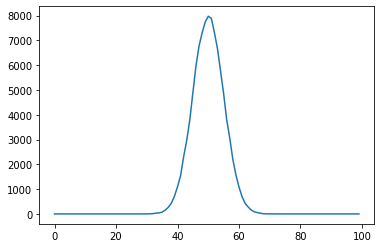

In [71]:
plt.plot(na) # 정규 분포도

어느 카지노에서 동전을 100번 던져서 몇 번 나오는지 배팅하는 게임이 있다.

길동이가 카지노에 가서 67번 나오는것에 배팅을 하였는데 대박을 맞았다.

대박을 맞을 확률은?

해당 카지노의 동전은 앞면이 나올 확률이 1/2라고 말할 수 있는지 검정하시오.

In [77]:
nac = np.cumsum(na)
print(nac[33]*2/100000*100,"%")

0.1 %


In [78]:
print("평균: ", np.mean(na), "표준편차: ",np.std(na))

평균:  1000.0 표준편차:  2156.5423993049617


In [79]:
#정규분포를 표준정규분포로 전환 - 스케일조정
na2 = na-np.mean(na)
print("평균: ", np.mean(na2), "표준편차: ",np.std(na2))
na3 = na2/np.std(na2)
print("평균: ", np.mean(na3), "표준편차: ",np.std(na3))

평균:  0.0 표준편차:  2156.5423993049617
평균:  -5.551115123125783e-18 표준편차:  0.9999999999999998


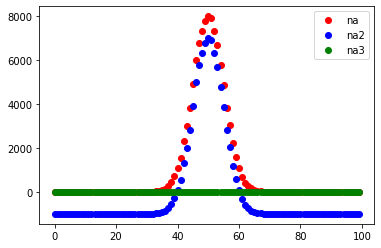

In [83]:
plt.plot(na,'ro',label ='na')
plt.plot(na2,'bo',label ='na2')
plt.plot(na3,'go',label ='na3')
plt.legend()
plt.show()

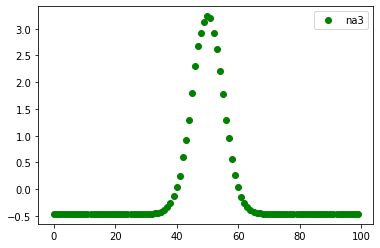

In [82]:
plt.plot(na3,'go',label ='na3')
plt.legend() # 표시사항
plt.show()